In [ ]:
#unzip /content/drive/MyDrive/Fashion_Project/YOLO/archive.zip -d /content/drive/MyDrive/Fashion_Project/YOLO/archive

In [ ]:
# Cite https://www.kaggle.com/code/rohitgadhwar/fashion-object-detection-yolov8/notebook

In [ ]:
# Install ultralytics
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.5/586.5 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 205.1/205.1 kB 22.2 MB/s eta 0:00:00


In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import random
import os
import cv2
import shutil
import tqdm
import glob
from ultralytics import YOLO

In [ ]:
# Check GPU is working or not
import torch
print(f"Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Using torch 2.0.0+cu118 (Tesla T4)


In [ ]:
images_path = '/content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/JPEGImages/'
annotations_path  = '/content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/Annotations_txt/'
path = '/content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/'

In [ ]:
# load pre-trained model
detection_model = YOLO("yolov8m.pt")

100%|██████████| 49.7M/49.7M [00:00<00:00, 76.1MB/s]


In [ ]:
def convert(size,x,y,w,h):
    box = np.zeros(4)
    dw = 1./size[0]
    dh = 1./size[1]
    x = x/dw
    w = w/dw
    y = y/dh
    h = h/dh
    box[0] = x-(w/2.0)
    box[1] = x+(w/2.0)
    box[2] = y-(h/2.0)
    box[3] = y+(h/2.0)

    return (box)

In [ ]:
def plot_annotations(img, filename):
    with open(annotations_path+filename, 'r') as f:
        for line in f:
            value = line.split()
            cls = int(value[0])
            x = float(value[1])
            y = float(value[2])
            w = float(value[3])
            h = float(value[4])
            
            img_h, img_w = img.shape[:2]
            bb = convert((img_w, img_h), x,y,w,h)
            cv2.rectangle(img, (int(round(bb[0])),int(round(bb[2]))),(int(round(bb[1])),int(round(bb[3]))),(255,0,0),2)
            plt.axis('off')
            plt.imshow(img)

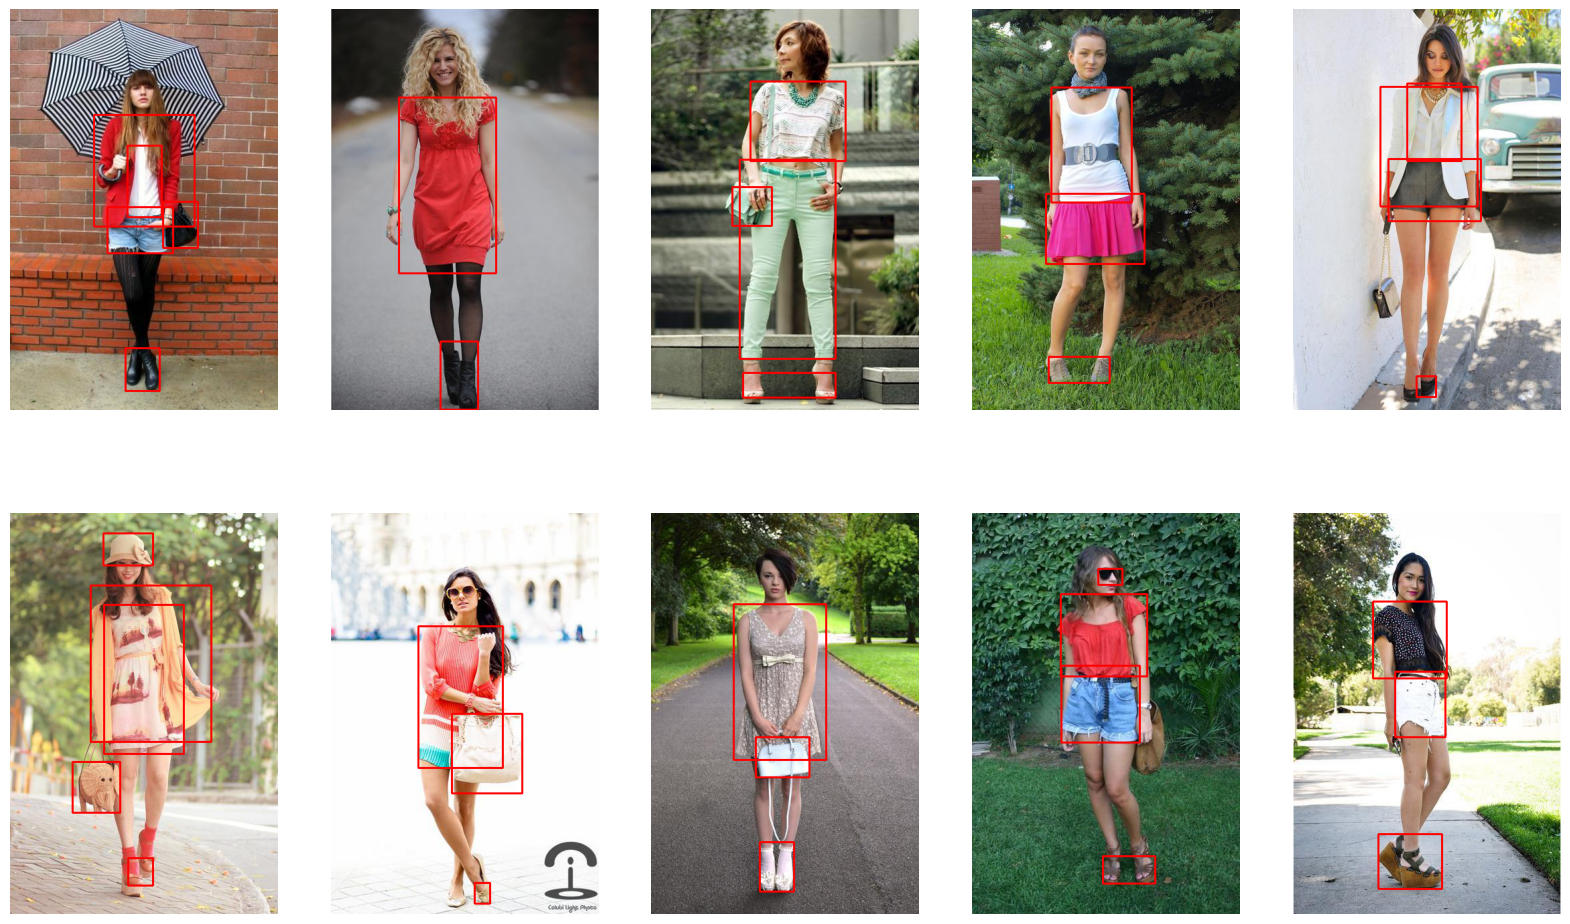

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np

plt.figure(figsize=(20,12))
ls = os.listdir(images_path)
c = 1
for i in random.sample(ls, 10):
    img = plt.imread(images_path+i)
    i = i.rstrip('.jpg') + '.txt'
    plt.subplot(2,5, c)
    plot_annotations(img, i)
    c+=1

In [ ]:
# train = []
# with open(path+'ImageSets/Main/trainval.txt', 'r') as f:
#     for line in f.readlines():
#         if line[-1]=='\n':
#             line = line[:-1]
#         train.append(line)

# test = []
# with open(path+'ImageSets/Main/test.txt', 'r') as f:
#     for line in f.readlines():
#         if line[-1]=='\n':
#             line = line[:-1]
#         test.append(line)

In [ ]:
# len(train), len(test)

In [ ]:
# os.mkdir(path +'train')
# os.mkdir(path +'train/images')
# os.mkdir(path +'train/labels')

# os.mkdir(path +'test')
# os.mkdir(path +'test/images')
# os.mkdir(path +'test/labels')

In [ ]:
# train_path = '/content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/train/'
# test_path = '/content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/test/'

# print('Copying Train Data..!!')
# for i in tqdm.tqdm(train):
#     a = shutil.copyfile(images_path+i+'.jpg', train_path+'images/'+i+'.jpg')
#     a = shutil.copyfile(annotations_path+i+'.txt', train_path+'labels/'+i+'.txt')

# print('Copying Test Data..!!')
# for i in tqdm.tqdm(test):
#     a = shutil.copyfile(images_path+i+'.jpg', test_path+'images/'+i+'.jpg')
#     a = shutil.copyfile(annotations_path+i+'.txt', test_path+'labels/'+i+'.txt')

In [ ]:
text = """
train: /content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/train
val: /content/drive/MyDrive/Fashion_Project/YOLO/archive/colorful_fashion_dataset_for_object_detection/test

# number of classes
nc: 10

# class names
names: ['sunglass','hat','jacket','shirt','pants','shorts','skirt','dress','bag','shoe']
"""
with open("data.yaml", 'w') as file:
    file.write(text)

In [ ]:
model = YOLO("yolov8m.pt")

model.train(data='data.yaml', epochs=10)

Ultralytics YOLOv8.0.90 🚀 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=

In [ ]:
model = YOLO("/content/drive/MyDrive/Fashion_Project/YOLO/runs/detect/train/weights/best.pt")

In [ ]:
# choose random image from dataset
plt.figure(figsize=(20,20))
imgs = random.sample(os.listdir(images_path), 6)
c=1
for img in imgs:
    i=model.predict(source=images_path+img, conf=0.4, save=True, line_thickness=2)

    im = plt.imread('/content/runs/detect/predict/'+img)
    plt.subplot(2,3,c)
    plt.axis('off')
    plt.imshow(im)
    c+=1

In [ ]:
marc_path = '/content/drive/MyDrive/Fashion_Project/test_images/Marc.jpeg'
marc_img = plt.imread(marc_path)
marc_prediction = model.predict(source=marc_path, conf=0.4, save=True, line_width=2)
img_boxes = marc_prediction[0].boxes

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/Fashion_Project/test_images/Marc.jpeg: 640x480 1 shirt, 1 pants, 1 shoe, 63.1ms
Speed: 11.7ms preprocess, 63.1ms inference, 37.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [ ]:
print(img_boxes.cls)
print(img_boxes)

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


tensor([3., 9., 4.], device='cuda:0')
ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[3.5824e+02, 4.3152e+02, 5.8420e+02, 6.8602e+02, 7.0090e-01, 3.0000e+00],
        [4.3375e+02, 8.0631e+02, 5.7013e+02, 9.0832e+02, 6.7400e-01, 9.0000e+00],
        [4.2835e+02, 6.3956e+02, 5.6230e+02, 8.4900e+02, 5.8764e-01, 4.0000e+00]], device='cuda:0')
cls: tensor([3., 9., 4.], device='cuda:0')
conf: tensor([0.7009, 0.6740, 0.5876], device='cuda:0')
data: tensor([[3.5824e+02, 4.3152e+02, 5.8420e+02, 6.8602e+02, 7.0090e-01, 3.0000e+00],
        [4.3375e+02, 8.0631e+02, 5.7013e+02, 9.0832e+02, 6.7400e-01, 9.0000e+00],
        [4.2835e+02, 6.3956e+02, 5.6230e+02, 8.4900e+02, 5.8764e-01, 4.0000e+00]], device='cuda:0')
id: None
is_track: False
orig_shape: tensor([1024,  768], device='cuda:0')
shape: torch.Size([3, 6])
xywh: tensor([[471.2188, 558.7732, 225.9637, 254.4987],
        [501.9416, 857.3125, 136.3821, 102.0133],
        [495.3265, 744.2832, 133.9557, 209.4375]], d

shirt


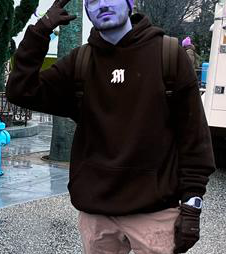

shoes


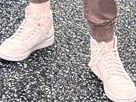

pants


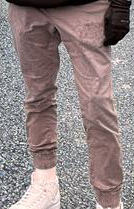

In [ ]:
from google.colab.patches import cv2_imshow

class_names = ["Sunglasses","hat","jacket","shirt","pants", "shorts","skirt","dress", "bag", "shoes"]
idx = 0
for box in img_boxes.xyxy:
    class_id = img_boxes.cls[idx]
    x, y, x2, y2 = box
    idx += 1
    x = round(x.item())
    y = round(y.item())
    x2 = round(x2.item())
    y2 = round(y2.item())

    # Get the class name from the class ID
    class_name = class_names[int(class_id.item())]

    # Crop the image based on the bounding box
    crop_img = marc_img[y:y2, x:x2]

    # Display the cropped image with the class name as the window title
    # cv2.imshow
    print(class_name)
    cv2_imshow(crop_img)
    #cv2.waitKey(0)

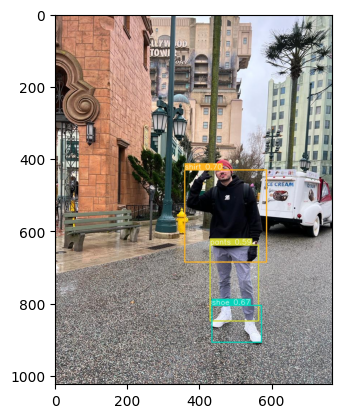

In [ ]:
im = plt.imread('/content/drive/MyDrive/Fashion_Project/YOLO/runs/detect/predict/Marc.jpeg')
plt.imshow(im)

WARNING ⚠️ 'line_thickness' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'line_width' instead.

image 1/1 /content/drive/MyDrive/Fashion_Project/test_images/Dana.jpeg: 640x480 1 dress, 2 shoes, 28.3ms
Speed: 3.8ms preprocess, 28.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


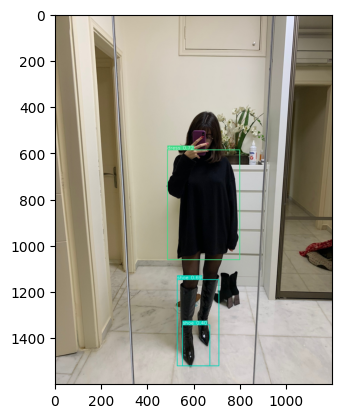

In [ ]:
dana_path = '/content/drive/MyDrive/Fashion_Project/test_images/Dana.jpeg'
marc_img = plt.imread(dana_path)
marc_prediction = model.predict(source=dana_path, conf=0.4, save=True, line_width=2)
im = plt.imread('/content/runs/detect/predict/Dana.jpeg')
plt.imshow(im)


image 1/1 /content/drive/MyDrive/Fashion_Project/images/Peroulla.jpeg: 640x480 1 hat, 1 shirt, 1 pants, 1 shoe, 98.6ms
Speed: 13.3ms preprocess, 98.6ms inference, 37.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


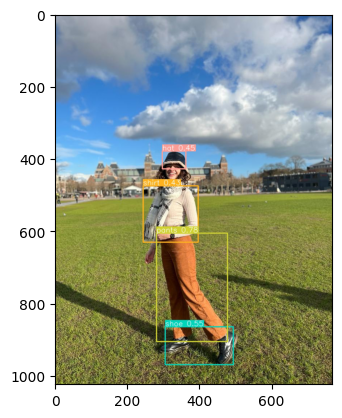

In [ ]:
peroulla_path = '/content/drive/MyDrive/Fashion_Project/test_images/Peroulla.jpeg'
peroulla_img = plt.imread(peroulla_path)
peroulla_prediction = model.predict(source=peroulla_path, conf=0.4, save=True, line_width=2)
im = plt.imread('/content/runs/detect/predict/Peroulla.jpeg')
plt.imshow(im)